## Predict The Flight Ticket Price

Contents
 - Importing libraries
 - Importing dataset
 - Preprocessing
 - Implementing models
 - Conclusion


### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# categorical encoding
from sklearn.preprocessing import LabelEncoder

# splitting dataset
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [ ]:
# mlp_clf = MLPClassifier(hidden_layer_sizes = (50,100,50), random_state=1,activation = "tanh" ,max_iter=500)
# mlp_clf = mlp_clf.fit(X_train,Y_train)
# y_pred_mlp = mlp_clf.predict(X_test)

### Importing dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/PRML/Bonus project/flight ticket.csv")
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since there are very less NaN values, we can drop them.

In [ ]:
dataset.dropna(inplace = True)
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Data Preprocessing

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


We have to convert date of journey to correct format so as to use it for predictions

In [ ]:
date = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
month = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataset.insert(loc=1, column='Date', value=date)
dataset.insert(loc=2, column='Month', value=month)
dataset.drop(["Date_of_Journey"],axis=1,inplace = True)
dataset


,Airline,Date,Month,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24,3,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1,5,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9,6,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12,5,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1,3,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27,4,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27,4,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,1,3,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Converting departure time to departure hour and minutes

In [ ]:
dep_hour = pd.to_datetime(dataset["Dep_Time"]).dt.hour
dep_min = pd.to_datetime(dataset["Dep_Time"]).dt.minute
dataset.insert(loc=6, column='Dep_hr', value=dep_hour)
dataset.insert(loc=7, column='Dep_min', value=dep_min)
dataset.drop(["Dep_Time"],axis=1,inplace = True)
dataset

,Airline,Date,Month,Source,Destination,Route,Dep_hr,Dep_min,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24,3,Banglore,New Delhi,BLR → DEL,22,20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1,5,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9,6,Delhi,Cochin,DEL → LKO → BOM → COK,9,25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12,5,Kolkata,Banglore,CCU → NAG → BLR,18,5,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1,3,Banglore,New Delhi,BLR → NAG → DEL,16,50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,CCU → BLR,19,55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27,4,Kolkata,Banglore,CCU → BLR,20,45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27,4,Banglore,Delhi,BLR → DEL,8,20,11:20,3h,non-stop,No info,7229
10681,Vistara,1,3,Banglore,New Delhi,BLR → DEL,11,30,14:10,2h 40m,non-stop,No info,12648


Converting arrival time to arrival hour and minutes

In [ ]:
ar_hour = pd.to_datetime(dataset["Arrival_Time"]).dt.hour
ar_min = pd.to_datetime(dataset["Arrival_Time"]).dt.minute
dataset.insert(loc=8, column='ar_hr', value=ar_hour)
dataset.insert(loc=9, column='ar_min', value=ar_min)
dataset.drop(["Arrival_Time"],axis=1,inplace = True)
dataset

,Airline,Date,Month,Source,Destination,Route,Dep_hr,Dep_min,ar_hr,ar_min,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24,3,Banglore,New Delhi,BLR → DEL,22,20,1,10,2h 50m,non-stop,No info,3897
1,Air India,1,5,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,50,13,15,7h 25m,2 stops,No info,7662
2,Jet Airways,9,6,Delhi,Cochin,DEL → LKO → BOM → COK,9,25,4,25,19h,2 stops,No info,13882
3,IndiGo,12,5,Kolkata,Banglore,CCU → NAG → BLR,18,5,23,30,5h 25m,1 stop,No info,6218
4,IndiGo,1,3,Banglore,New Delhi,BLR → NAG → DEL,16,50,21,35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,CCU → BLR,19,55,22,25,2h 30m,non-stop,No info,4107
10679,Air India,27,4,Kolkata,Banglore,CCU → BLR,20,45,23,20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27,4,Banglore,Delhi,BLR → DEL,8,20,11,20,3h,non-stop,No info,7229
10681,Vistara,1,3,Banglore,New Delhi,BLR → DEL,11,30,14,10,2h 40m,non-stop,No info,12648


In [ ]:
duration = list(dataset["Duration"])

Converting duration to hours and minutes

In [ ]:
dur_hr = []
dur_min = []
for i in range(len(duration)):
  if(len(duration[i].split()) != 2):
    if "h" in duration[i]:
      duration[i] = duration[i] + " 0m"
    else:
      duration[i] = "0h " + duration[i]
  
for i in range(len(duration)):
  dur_hr.append(int(duration[i].split(sep = "h")[0]))
  dur_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [ ]:
print(len(dur_hr))

10682


In [ ]:
dataset.insert(loc=10, column='dur_hr', value=dur_hr)
dataset.insert(loc=11, column='dur_min', value=dur_min)
dataset.drop(["Duration"],axis=1,inplace = True)
dataset

,Airline,Date,Month,Source,Destination,Route,Dep_hr,Dep_min,ar_hr,ar_min,dur_hr,dur_min,Total_Stops,Additional_Info,Price
0,IndiGo,24,3,Banglore,New Delhi,BLR → DEL,22,20,1,10,2,50,non-stop,No info,3897
1,Air India,1,5,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,50,13,15,7,25,2 stops,No info,7662
2,Jet Airways,9,6,Delhi,Cochin,DEL → LKO → BOM → COK,9,25,4,25,19,0,2 stops,No info,13882
3,IndiGo,12,5,Kolkata,Banglore,CCU → NAG → BLR,18,5,23,30,5,25,1 stop,No info,6218
4,IndiGo,1,3,Banglore,New Delhi,BLR → NAG → DEL,16,50,21,35,4,45,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,CCU → BLR,19,55,22,25,2,30,non-stop,No info,4107
10679,Air India,27,4,Kolkata,Banglore,CCU → BLR,20,45,23,20,2,35,non-stop,No info,4145
10680,Jet Airways,27,4,Banglore,Delhi,BLR → DEL,8,20,11,20,3,0,non-stop,No info,7229
10681,Vistara,1,3,Banglore,New Delhi,BLR → DEL,11,30,14,10,2,40,non-stop,No info,12648


Categorical encoding

In [ ]:
le = LabelEncoder()
dataset['Airline'] = le.fit_transform(dataset['Airline'])
dataset['Airline'].value_counts()

4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [ ]:
dataset['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
dataset['Source'] = dataset['Source'].replace({"Delhi": 0,"Kolkata": 1, "Banglore": 3, "Mumbai":4, "Chennai":5})
dataset['Source'].value_counts()


0    4536
1    2871
3    2197
4     697
5     381
Name: Source, dtype: int64

In [ ]:
dataset['Destination'] = dataset['Destination'].replace(to_replace ="New Delhi",value = "Delhi")
dataset['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
dataset['Destination'] = dataset['Destination'].replace({"Delhi": 0,"Kolkata": 1, "Banglore": 3, "Cochin":4, "Hyderabad":5})
dataset['Destination'].value_counts()

4    4536
3    2871
0    2197
5     697
1     381
Name: Destination, dtype: int64

In [ ]:
dataset['Total_Stops'] = dataset['Total_Stops'].replace({"non-stop": 0,"1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops":4})
dataset["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
dataset

,Airline,Date,Month,Source,Destination,Route,Dep_hr,Dep_min,ar_hr,ar_min,dur_hr,dur_min,Total_Stops,Additional_Info,Price
0,3,24,3,3,0,BLR → DEL,22,20,1,10,2,50,0,No info,3897
1,1,1,5,1,3,CCU → IXR → BBI → BLR,5,50,13,15,7,25,2,No info,7662
2,4,9,6,0,4,DEL → LKO → BOM → COK,9,25,4,25,19,0,2,No info,13882
3,3,12,5,1,3,CCU → NAG → BLR,18,5,23,30,5,25,1,No info,6218
4,3,1,3,3,0,BLR → NAG → DEL,16,50,21,35,4,45,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,1,3,CCU → BLR,19,55,22,25,2,30,0,No info,4107
10679,1,27,4,1,3,CCU → BLR,20,45,23,20,2,35,0,No info,4145
10680,4,27,4,3,0,BLR → DEL,8,20,11,20,3,0,0,No info,7229
10681,10,1,3,3,0,BLR → DEL,11,30,14,10,2,40,0,No info,12648


In [ ]:
dataset['Additional_Info'] = le.fit_transform(dataset['Additional_Info'])
dataset['Additional_Info'].value_counts()

8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: Additional_Info, dtype: int64

Route and total stops are related to each other

In [ ]:
dataset.drop(["Route"],axis=1,inplace = True)
dataset

,Airline,Date,Month,Source,Destination,Dep_hr,Dep_min,ar_hr,ar_min,dur_hr,dur_min,Total_Stops,Additional_Info,Price
0,3,24,3,3,0,22,20,1,10,2,50,0,8,3897
1,1,1,5,1,3,5,50,13,15,7,25,2,8,7662
2,4,9,6,0,4,9,25,4,25,19,0,2,8,13882
3,3,12,5,1,3,18,5,23,30,5,25,1,8,6218
4,3,1,3,3,0,16,50,21,35,4,45,1,8,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,1,3,19,55,22,25,2,30,0,8,4107
10679,1,27,4,1,3,20,45,23,20,2,35,0,8,4145
10680,4,27,4,3,0,8,20,11,20,3,0,0,8,7229
10681,10,1,3,3,0,11,30,14,10,2,40,0,8,12648


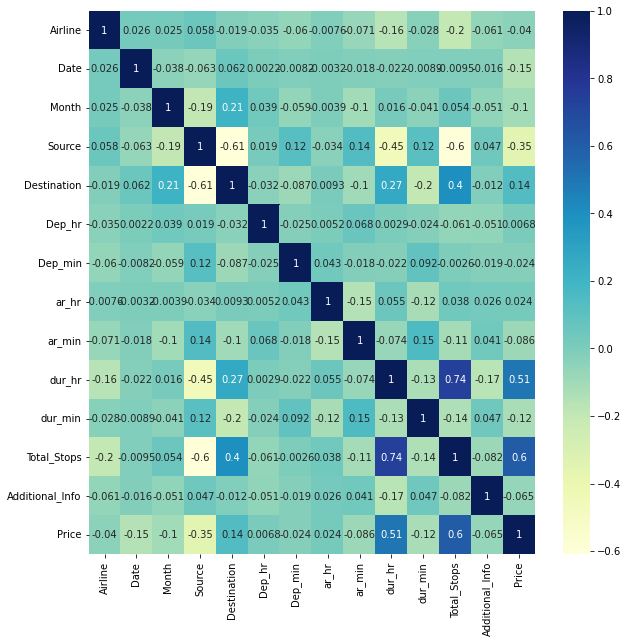

In [ ]:
plt.figure(figsize = (10,10))
sb.heatmap(dataset.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Splitting dataset

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Implementing models

In [ ]:
testing_score = dict()
mse_score = dict()
r2score = dict()

Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x_train,y_train)
lin_pred = lin_reg.predict(x_test)

mse_score["linear regression"] = MSE(y_test,lin_pred)
testing_score["linear regression"] = lin_reg.score(x_test,y_test)
r2score["linear regression"] = r2_score(y_test,lin_pred)

print("MSE: ", MSE(y_test,lin_pred))
print("r2_score: ",r2_score(y_test,lin_pred))
print("score on training data: ",lin_reg.score(x_train,y_train))
print("score on test data: ",lin_reg.score(x_test,y_test))

MSE:  10631348.85386795
r2_score:  0.4624388902301443
score on training data:  0.4281871645618591
score on test data:  0.4624388902301443


Decision tree regression

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg = dt_reg.fit(x_train,y_train)
dt_pred = dt_reg.predict(x_test)

print("MSE: ", MSE(y_test,dt_pred))
print("r2_score: ",r2_score(y_test,dt_pred))
print("score on training data: ",dt_reg.score(x_train,y_train))
print("score on test data: ",dt_reg.score(x_test,y_test))

MSE:  4511372.351196048
r2_score:  0.7718879926688076
score on training data:  0.9964196033960362
score on test data:  0.7718879926688076


In [ ]:
score_dt = []
for i in range(2,20):
  dt_reg = DecisionTreeRegressor(random_state=0,max_depth=i)
  dt_reg = dt_reg.fit(x_train,y_train)
  dt_pred = dt_reg.predict(x_test)
  score_dt.append(dt_reg.score(x_test,y_test))

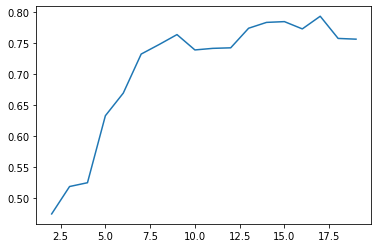

In [ ]:
plt.plot(range(2,20),score_dt)

In [ ]:
print("max depth for best score is: ",score_dt.index(max(score_dt))+2)

max depth for best score is:  17


In [ ]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=17)
dt_reg = dt_reg.fit(x_train,y_train)
dt_pred = dt_reg.predict(x_test)

mse_score["Decision tree regression"] = MSE(y_test,dt_pred)
r2score["Decision tree regression"] = r2_score(y_test,dt_pred)
testing_score["Decision tree regression"] = dt_reg.score(x_test,y_test)

print("MSE: ", MSE(y_test,dt_pred))
print("r2_score: ",r2_score(y_test,dt_pred))
print("score on training data: ",dt_reg.score(x_train,y_train))
print("score on test data: ",dt_reg.score(x_test,y_test))

MSE:  4078902.8144783513
r2_score:  0.793755284138134
score on training data:  0.9893101012666784
score on test data:  0.793755284138134


Random forest regression

In [ ]:
rf_reg = RandomForestRegressor(random_state=0)
rf_reg = rf_reg.fit(x_train,y_train)
rf_pred = rf_reg.predict(x_test)

print("MSE: ", MSE(y_test,rf_pred))
print("r2_score: ",r2_score(y_test,rf_pred))
print("score on training data: ",rf_reg.score(x_train,y_train))
print("score on test data: ",rf_reg.score(x_test,y_test))

MSE:  2589326.0888447193
r2_score:  0.8690739035085853
score on training data:  0.9792167141901794
score on test data:  0.8690739035085853


In [ ]:
score_rf = []
for i in range(2,20):
  rf_reg = RandomForestRegressor(random_state=0,max_depth=i)
  rf_reg = rf_reg.fit(x_train,y_train)
  score_rf.append(rf_reg.score(x_test,y_test))

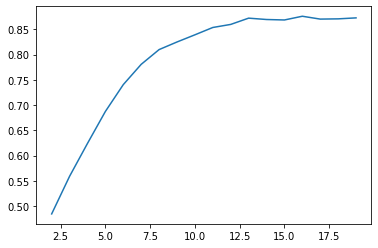

In [ ]:
plt.plot(range(2,20),score_rf)

In [ ]:
print("max depth for best score is: ",score_rf.index(max(score_rf))+2)

max depth for best score is:  16


In [ ]:
rf_reg = RandomForestRegressor(random_state=0,max_depth=16)
rf_reg = rf_reg.fit(x_train,y_train)
rf_pred = rf_reg.predict(x_test)

mse_score["Random forest regression"] = MSE(y_test,rf_pred)
r2score["Random forest regression"] = r2_score(y_test,rf_pred)
testing_score["Random forest regression"] = rf_reg.score(x_test,y_test)

print("MSE: ", MSE(y_test,rf_pred))
print("r2_score: ",r2_score(y_test,rf_pred))
print("score on training data: ",rf_reg.score(x_train,y_train))
print("score on test data: ",rf_reg.score(x_test,y_test))

MSE:  2457370.7946247146
r2_score:  0.8757460610471939
score on training data:  0.9754922220801947
score on test data:  0.8757460610471939


K nearest neighbours

In [ ]:
knn = KNeighborsRegressor()
knn = knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

mse_score["knn"] = MSE(y_test,knn_pred)
testing_score["knn"] = knn.score(x_test,y_test)
r2score["knn"] = r2_score(y_test,knn_pred)

print("MSE: ", MSE(y_test,knn_pred))
print("r2_score: ",r2_score(y_test,knn_pred))
print("score on training data: ",knn.score(x_train,y_train))
print("score on test data: ",knn.score(x_test,y_test))

MSE:  6970696.811806551
r2_score:  0.6475352689926446
score on training data:  0.7511625958903534
score on test data:  0.6475352689926446


### Conclusion

In [ ]:
summary = pd.DataFrame({"Models":testing_score.keys() , 
                        "MSE": mse_score.values() , 
                        "Testing score": testing_score.values() ,
                        "R2 score": r2score.values()})
summary

,Models,MSE,Testing score,R2 score
0,linear regression,1.063135e+07,0.462439,0.462439
1,Decision tree regression,4.078903e+06,0.793755,0.793755
2,Random forest regression,2.457371e+06,0.875746,0.875746
3,knn,6.970697e+06,0.647535,0.647535


The best model applicable here is random forest regression

Final model

In [ ]:
rf_reg = RandomForestRegressor(random_state=0,max_depth = 16)
rf_reg = rf_reg.fit(x_train,y_train)
rf_pred = rf_reg.predict(x_test)

print("r2_score: ",r2_score(y_test,rf_pred))
print("score on training data: ",rf_reg.score(x_train,y_train))
print("score on test data: ",rf_reg.score(x_test,y_test))

r2_score:  0.8757460610471939
score on training data:  0.9754922220801947
score on test data:  0.8757460610471939
